# Homewrok2 Coding: Logistic Regression.
#### Due: November 9, 23:59 p.m. Please export this jupyter notebook as PDF, and hand in .pdf file on BB.


### In this part of homework, you need to implement Logistic Regression using Python in this jupyter notebook.

In [1]:
#importing all the required libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
#Loading the dataset
data = load_breast_cancer().data
target = load_breast_cancer().target

In [3]:
data.shape

(569, 30)

In [4]:
np.unique(target,return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [5]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.33, random_state = 42)

In [6]:
#Standardizing data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

###  Some helper functions are given below, you are free to use them or not.

In [7]:
# Function to predict y of x with current weights
def predict(x,w):
    y_pred=[]
    for i in range(len(x)):
        y = (np.asscalar(1/(1+np.exp(-(np.dot(w,x[i]))))))
        if y<0.5:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return np.array(y_pred)

In [8]:
#Function to calulate TPR,FPR,TNR and FNR to be included in confusion matrix
def find_rates(mat):
    mat2=[]
    mat2.append((mat[0,0]))
    mat2.append((mat[1,0]))
    mat2.append((mat[0,1]))
    mat2.append((mat[1,1]))
    mat2=np.reshape(mat2,(2,2))
    mat2 = pd.DataFrame(mat2,columns=[0,1],index=[0,1])
    mat2.index.name = 'Predicted'
    mat2.columns.name = 'Actual'
    return mat2

## Part 1: Implement Logistic Regression using sklearn.

### Sklearn Implementation Example

In [9]:
#Logistic regression using sklearn
LRclf = LogisticRegression(penalty = 'l2', C=0.1, solver = 'liblinear')
LRclf.fit(X_train, y_train)

LogisticRegression(C=0.1, solver='liblinear')

In [10]:
y_pred_sklearn = LRclf.predict(X_test)

In [11]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([ 67, 121], dtype=int64))

In [12]:
np.unique(y_pred_sklearn,return_counts=True)

(array([0, 1]), array([ 67, 121], dtype=int64))

In [13]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sklearn).ravel()
(tn, fp, fn, tp)

(66, 1, 1, 120)

<AxesSubplot:title={'center':'Confusion Matrix for test data using sklearn Logistic Regression'}, xlabel='Actual', ylabel='Predicted'>

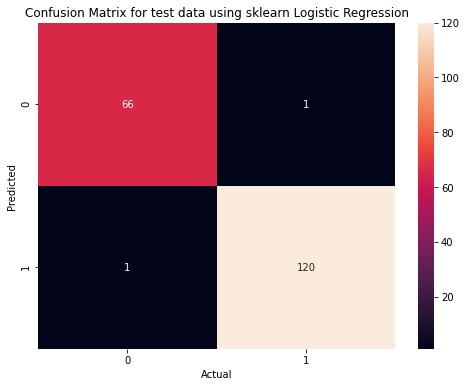

In [14]:
mat_test = find_rates(confusion_matrix(y_test, y_pred_sklearn))

fig=plt.figure(figsize=(8,6))
plt.title('Confusion Matrix for test data using sklearn Logistic Regression')
sns.heatmap(mat_test,annot=True,fmt='g')

In [15]:
LRclf.score(X_test, y_test)

0.9893617021276596

### Now try different solvers and parameters. Answer these questions below:
#### 1. Explain the parameters and their effects in LogisticRegression()
#### 2. Is it feasible to set parameters 'penalty' and 'solver' to (penalty = 'l1', solver = 'newton-cg')? If not, briefly explain why (you don't have to do any mathematical derivation).
#### Hints: you can read official document from 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

## Part 2: Implement Logistic Regression without using its library. In other words, you need to implement logistic regression by yourself

In [26]:
# In this part, the hyper parameters are given, do not change them. 
# Note that the Logistic regression in this part has regularization terms.

### Part 2.1: Implement logistic regression using Batch-GD

In [17]:
"""
At each iteration, train all the samples and update weights.
"""
n_iter=50  # number of iterations
reg=0.01   # regularization parameter lambda
r=0.1      # learning rate
sample_size=X_train.shape[0]    # batch size for BGD
N=X_train.shape[0]


for j in range(n_iter):
    #Your codes below:
    


In [27]:
#Getting predictions for test datapoints
y_pred_BGD = predict(X_test,w_BGD)

In [ ]:
np.unique(y_test,return_counts=True)

In [ ]:
np.unique(y_pred_BGD,return_counts=True)

In [ ]:
# Draw confusion matrix
mat_test = find_rates(confusion_matrix(y_test, y_pred_BGD))

fig=plt.figure(figsize=(8,6))
plt.title('Confusion Matrix for test data using BGD Logistic Regression')
sns.heatmap(mat_test,annot=True,fmt='g')

### Part 2.2: Implement logistic regression using SGD

In [18]:
"""
In this part, you need to implement logistic regression using SGD method. 
At each iteration, choose 20 samples randomly and compute dJ(theta)/d(theta) among 
those 20 samples then update the vector of weights.

***Note that the random seed at each iteration is given, do NOT modify it!!!***
"""
n_iter=50  # number of iterations
reg=0.01   # regularization parameter lambda
r=0.1      # learning rate
sample_size=20    # sample size for SGD
N=X_train.shape[0]

for j in range(n_iter):
    np.random.seed(j) 
    idx=np.random.randint(X_train.shape[0],size=sample_size) 
    # Do NOT modify codes above, especially the random code.
    # At each iterations, choose samples from X_train, y_train, with index idx.
    # Your codes below:
    
    


In [28]:
#Getting predictions for test datapoints
y_pred_SGD = predict(X_test,w_SGD)

In [21]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([ 67, 121], dtype=int64))

In [22]:
np.unique(y_pred_SGD,return_counts=True)

(array([0, 1]), array([ 71, 117], dtype=int64))

<AxesSubplot:title={'center':'Confusion Matrix for test data using custom Logistic Regression'}, xlabel='Actual', ylabel='Predicted'>

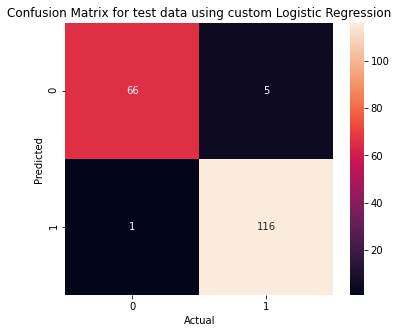

In [23]:
# Draw confusion matrix
mat_test = find_rates(confusion_matrix(y_test, y_pred_SGD))

fig=plt.figure(figsize=(8,6))
plt.title('Confusion Matrix for test data using SGD Logistic Regression')
sns.heatmap(mat_test,annot=True,fmt='g')

In [25]:
"""
Print a table to show every coefficients in vector w, 
and compute the absolute difference between coefficients of BGD and SGD methods.
"""

from prettytable import PrettyTable
p = PrettyTable()
p.title='Weights from both models'
p.field_names=['SKlearn','BGD', 'SGD', 'Difference']

# You can rewrite codes below
# Please remain five decimal places
for i in range(30):
    p.add_row(['{:.5f}'.format(LRclf.coef_[0,i]),'{:.5f}'.format(w_BGD[i]), 
               '{:.5f}'.format(w_SGD[i]), '{:.5f}'.format(abs(w_BGD[i]-w_SGD[i]))])
print(p)

+-----------------------------------------------------------------------------------------------+
|                                    Weights from both models                                   |
+----------------------+-----------------------+-----------------------+------------------------+
|       SKlearn        |          BGD          |          SGD          |       Difference       |
+----------------------+-----------------------+-----------------------+------------------------+
| -0.3326881417332304  |  -0.3132032310541358  |  -0.3121617953334547  | 0.0010414357206811053  |
| -0.35660491409077977 |  -0.23830989757781745 |  -0.2479157757447402  |  0.009605878166922738  |
| -0.32617772142158075 |  -0.3128037501064457  |  -0.31152195704524827 | 0.0012817930611974115  |
| -0.3399466623030492  |  -0.30531436581363514 |  -0.30173131655089724 |  0.003583049262737892  |
| -0.12556328983383272 |  -0.12162129978153186 |  -0.13028713348031923 |  0.008665833698787373  |
| 0.0308539434025402

In [ ]:
# Hint: Given hyperparameters and random seeds, the w obtained by BGD and SGD should be unique. 
# In fact, the answer has been shown to you, if yours are not the same with the answer, score will be penalized.
